In [40]:
# import libraries

import random
import math
from pathlib import Path
from tqdm.auto import tqdm

import numpy as np
import matplotlib.pyplot as plt


import torchinfo # show model summary

# pytorch imports
import torch
from torch.utils.data import DataLoader

# torch vision modules
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor 
from torch import nn

# baseline models


# metrics module
import torchmetrics

# tracking metrics
import wandb
# import tensorboard

In [4]:
# device agnostic code
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Current hardware device: {DEVICE}")

Current hardware device: cuda


#### Downloading and Loading Datasets

In [5]:
# image Transforms
# train_tranforms = [transforms.ToTensor()]

In [7]:
# MNIST train data
train_data = datasets.MNIST(
    root="mnist_data",
    train=True,
    transform=ToTensor(),
    download=True,
)

# MNIST test data
test_data = datasets.MNIST(
    root="mnist_data",
    train=False,
    transform=ToTensor(),
    download=True,
)

In [56]:
print(f"Train data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")
print(f"Image size: {np.array(train_data[0][0].shape)}")

Train data size: 60000
Test data size: 10000
Image size: [ 1 28 28]


In [8]:
BATCH_SIZE = 32 # number of samples per mini-batches

In [9]:
# train dataloader iterable
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# test dataloader iterable
test_dataloader= DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
)

In [10]:
class_labels = train_data.classes # images class labels
print(f"class labels: {class_labels}")

class labels: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


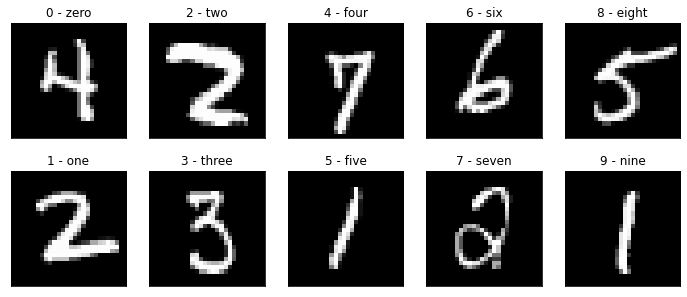

In [36]:
# display MNIST sample images

data, label = next(iter(train_dataloader))
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12,5))

for i, image in enumerate(data[:10]):
    image = image.detach()
    image = image.squeeze(dim=0)
    axs[i%2, i//2].imshow(image.numpy(), cmap="gray")
    axs[i%2, i//2].set(xticks=[], yticks=[])
    axs[i%2, i//2].set_title(class_labels[i])


#### Baseline Models

In [102]:
googlenet_weight = torchvision.models.GoogLeNet_Weights.IMAGENET1K_V1
googlenet_model = torchvision.models.GoogLeNet(init_weights=googlenet_weight)

In [117]:
# set the outputnof the fullyconnected layers to number of classes of MNIST
googlenet_mnist_fc = nn.Sequential(
    nn.Linear(in_features=1024, out_features=len(class_labels), bias=True)
)
googlenet_model.fc = googlenet_mnist_fc

In [118]:
# freezing the features layers
for param in googlenet_model.parameters():
    param.requires_grad = False

# set FC layer to trainable
for params in googlenet_model.fc.parameters():
    param.requires_grad = True

In [119]:
# model architecture
torchinfo.summary(googlenet_model,
                  input_size=(32, 3, 28, 28), 
                  col_names=["input_size", "output_size", "num_params", "trainable"],
                  col_width=60,
                  row_settings=["var_names"]
                  )

Layer (type (var_name))                  Input Shape                                                  Output Shape                                                 Param #                                                      Trainable
GoogLeNet (GoogLeNet)                    [32, 3, 28, 28]                                              [32, 10]                                                     6,379,984                                                    Partial
├─BasicConv2d (conv1)                    [32, 3, 28, 28]                                              [32, 64, 14, 14]                                             --                                                           False
│    └─Conv2d (conv)                     [32, 3, 28, 28]                                              [32, 64, 14, 14]                                             (9,408)                                                      False
│    └─BatchNorm2d (bn)                  [32, 64, 14, 14]                 

##### Hyper-parameter Initialisations

##### Model Trains

##### Visualisations

In [ ]:
torchmetrics.ConfusionMatrix